In [1]:
import os

import numpy
from PIL import Image
from masktextspotterv3.textspotter import MaskTextSpotter

from masktextspotterv3.config import cfg

DATAPATH = '../data'

In [2]:
# Init Model instance 
cfg.merge_from_file('%s/seg_rec_poly_fuse_feature.yaml' % DATAPATH)
# print('initing ocr model')
cfg['MODEL']['WEIGHT'] = '%s/MaskTextSpotterV3_trained_model.pth' % DATAPATH
cfg['MODEL']['DEVICE'] = 'cpu'

target_size = 800
mts = MaskTextSpotter(
    cfg,
    min_image_size=target_size,
    confidence_threshold=0.7,
    output_polygon=True,
    spellfix=True
)

Test Image:


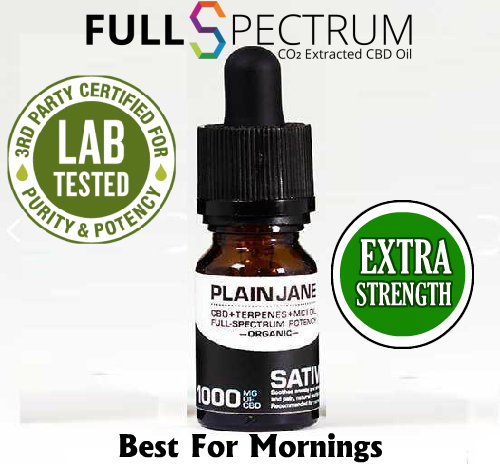

In [3]:
# Load Image Obj
img_obj = Image.open('%s/demo_test_image.png' % DATAPATH)

img_obj = img_obj.convert('RGB')

img_size = img_obj.size
# print(datetime.datetime.now(), 'convert rgb')
width = img_size[0]
height = img_size[1]
if max(width, height) > target_size:
    if width > height:
        new_width = target_size
        new_height = int(height * target_size / width)
    else:
        new_width = int(width * target_size / height)
        new_height = target_size
    img_obj = img_obj.resize((new_width, new_height))
    print('ocr resize %s,%s -> %s,%s' % (width, height, new_width, new_height))
else:
    img_obj = img_obj
    
print('Test Image:')
img_obj

OCR result:
['full', 'pectrum', 'extracted', 'certified', 'lab', '3rd', 'tested', 'purity', 'potengy', 'extra', 'strength', 'plain', 'sat', '1000', 'best', 'for']
OCR Result Image:


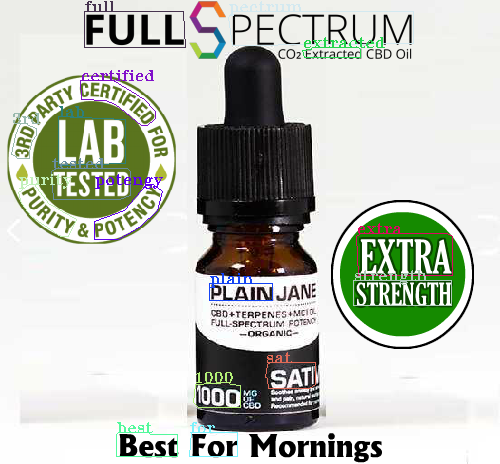

In [5]:
result_polygons, result_words, result_lines = mts.run_on_pillow_image(img_obj)
open_cv_image = numpy.array(img_obj)
# Convert RGB to BGR
open_cv_image = open_cv_image[:, :, ::-1].copy()
result_image = mts.visualization(open_cv_image, result_polygons, result_words)
result_image = Image.fromarray(result_image[:, :, ::-1])

# result_image.save('%s/demo_results.jpg' % DATAPATH)
print('OCR result:')
print(result_words)
print('OCR Result Image:')
result_image